In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import netCDF4 as nc


In [80]:
ds = nc.Dataset('olr_2deg2015.nc')

lat=np.asarray(ds['latitude'])
lon=np.asarray(ds['longitude'])
lat

array([ 90.,  88.,  86.,  84.,  82.,  80.,  78.,  76.,  74.,  72.,  70.,
        68.,  66.,  64.,  62.,  60.,  58.,  56.,  54.,  52.,  50.,  48.,
        46.,  44.,  42.,  40.,  38.,  36.,  34.,  32.,  30.,  28.,  26.,
        24.,  22.,  20.,  18.,  16.,  14.,  12.,  10.,   8.,   6.,   4.,
         2.,   0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14., -16., -18.,
       -20., -22., -24., -26., -28., -30., -32., -34., -36., -38., -40.,
       -42., -44., -46., -48., -50., -52., -54., -56., -58., -60., -62.,
       -64., -66., -68., -70., -72., -74., -76., -78., -80., -82., -84.,
       -86., -88., -90.], dtype=float32)

In [86]:
nmap = 2
nmem = 3
np.arange(0,nmem*nmap)

array([0, 1, 2, 3, 4, 5])

In [91]:
x = np.zeros(np.shape(psi1))
y = x[:,None,:,:]
y.shape
z = np.zeros(np.shape(psi1))
z = y
z.shape
olr = FF1['ttr']
olr.resample(time='1D').mean('time')

(365, 1, 91, 180)

In [2]:
FF1 = xr.open_dataset('olr_2deg1980.nc')
psi1 = np.asarray(FF1['ttr'].groupby(FF1.time.dt.date).mean('time'))  # u200
sum(np.argwhere(np.isnan(psi1)))

0

In [3]:
np.savetxt('testpsi.csv', psi1[0,:,:], delimiter=",")

In [28]:
Fn1 = '/global/homes/l/linyaoly/ERA5/reanalysis/u200_2deg1980.nc'  #changed by lin
Fn2 = '/global/homes/l/linyaoly/ERA5/reanalysis/u850_2deg1980.nc'  #changed by lin
Fn3 = '/global/homes/l/linyaoly/ERA5/reanalysis/olr_2deg1980.nc'  #changed by lin
Fn4 = '/global/homes/l/linyaoly/ERA5/reanalysis/prep_2deg1980.nc'  #changed by lin
Fn5 = '/global/homes/l/linyaoly/ERA5/reanalysis/v200_2deg1980.nc'  #changed by lin
Fn6 = '/global/homes/l/linyaoly/ERA5/reanalysis/T200_2deg1980.nc'  #changed by lin

# open six datasets
FF1=xr.open_dataset(Fn1) #changed by lin
FF2=xr.open_dataset(Fn2) #changed by lin
FF3=xr.open_dataset(Fn3) #changed by lin
FF4=xr.open_dataset(Fn4) #changed by lin
FF5=xr.open_dataset(Fn5) #changed by lin
FF6=xr.open_dataset(Fn6) #changed by lin

# calculate daily average
psi1=np.asarray(FF1['u'].groupby(FF1.time.dt.date).mean('time'))  # u200
psi2=np.asarray(FF2['u'].groupby(FF2.time.dt.date).mean('time'))  # u850
psi3=np.asarray(FF3['ttr'].groupby(FF3.time.dt.date).mean('time'))  # olr
psi4=np.asarray(FF4['tp'].groupby(FF4.time.dt.date).mean('time'))  # prep
psi5=np.asarray(FF5['v'].groupby(FF5.time.dt.date).mean('time'))  # sst
psi6=np.asarray(FF6['t'].groupby(FF6.time.dt.date).mean('time'))  # T200

psi1 = np.reshape(psi1,(np.size(psi1,0),1,np.size(psi1,1),np.size(psi1,2))) 
psi2 = np.reshape(psi2,(np.size(psi2,0),1,np.size(psi2,1),np.size(psi2,2))) 
psi3 = np.reshape(psi3,(np.size(psi3,0),1,np.size(psi3,1),np.size(psi3,2))) 
psi4 = np.reshape(psi4,(np.size(psi4,0),1,np.size(psi4,1),np.size(psi4,2))) 
psi5 = np.reshape(psi5,(np.size(psi5,0),1,np.size(psi5,1),np.size(psi5,2))) 
psi6 = np.reshape(psi6,(np.size(psi6,0),1,np.size(psi6,1),np.size(psi6,2))) 

psi = np.concatenate((psi1,psi2,psi3,psi4,psi5,psi6),axis=1)

In [31]:
sum(np.argwhere(np.isnan(psi)))
# import matplotlib.pyplot as plt 
# plt.contour(x)

0

In [24]:
import pandas as pd 
sst = FF5['sst'].groupby(FF5.time.dt.date).mean('time')[0,:,:]
lon = FF5['longitude']
lat = FF5['latitude']

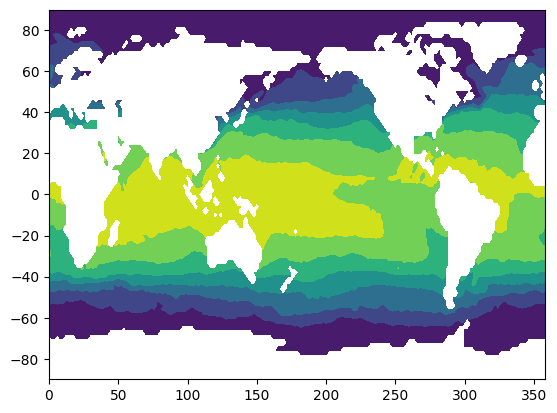

In [27]:
plt.contourf(lon,lat,sst)

In [1]:
import numpy as np
import xarray as xr
import netCDF4


In [49]:
flg = 'olr'
varn = 'ttr'
ds1 = xr.open_mfdataset(flg+'_2deg*.nc')

In [50]:
ds1

<xarray.Dataset>
Dimensions:    (longitude: 180, latitude: 91, time: 63428)
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2022-05-31T18:00:00
Data variables:
    ttr        (time, latitude, longitude) float32 dask.array<chunksize=(1460, 91, 180), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-03 20:38:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [51]:
# ds1=ds1.rename({"ttr":"olr","longitude":"lon","latitude":"lat"})
ds1=ds1.rename({varn:flg,"longitude":"lon","latitude":"lat"})
ds1

<xarray.Dataset>
Dimensions:  (lon: 180, lat: 91, time: 63428)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1979-01-01 ... 2022-05-31T18:00:00
Data variables:
    olr      (time, lat, lon) float32 dask.array<chunksize=(1460, 91, 180), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-03 20:38:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [52]:
# ds1=ds1.groupby("time.date").mean('time')

In [53]:
# ds1

In [54]:
# ds1=ds1.rename({"date":"time"})
# import pandas as pd
# ds1['time'] = pd.to_datetime(ds1.time)
ds1=ds1.resample(time='1D').mean()

In [55]:
ds1 

<xarray.Dataset>
Dimensions:  (time: 15857, lon: 180, lat: 91)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-05-31
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
Data variables:
    olr      (time, lat, lon) float32 dask.array<chunksize=(1, 91, 180), meta=np.ndarray>

In [56]:
ds1.to_netcdf('ERA5.'+flg+'.day.nc')

In [57]:
# xr.open_dataset('ERA5.u200.day.nc')

In [58]:
# import netCDF4 
# ds = netCDF4.Dataset('/pscratch/sd/l/linyaoly/ERA5/Unet/reanalysis/ERA5.olr.6hr1979to2022.nc')
# ds['time']

In [59]:
# ds = netCDF4.Dataset('/pscratch/sd/l/linyaoly/ERA5/Unet/reanalysis/ERA5.u200.6hr1979to2022.nc')
# ds['time']

In [60]:
# xr.open_dataset('/pscratch/sd/l/linyaoly/ERA5/Unet/reanalysis/ERA5.u850.6hr1979to2022.nc')

In [61]:
# import netCDF4 
# ds = netCDF4.Dataset('/pscratch/sd/l/linyaoly/ERA5/Unet/reanalysis/ERA5.olr.6hr1979to2022.nc')
# type(ds['olr'][0,0,0])

In [62]:
# import netCDF4 
# ds = netCDF4.Dataset('u850_2deg1979.nc')
# ds['u']


In [63]:
# ds = xr.open_dataset('u850_2deg1979.nc')
# ds['u'][0,0,0]

In [64]:
# import netCDF4 
# ds = netCDF4.Dataset('/pscratch/sd/l/linyaoly/ERA5/Unet/reanalysis/ERA5.u850.day.nc')
# ds['u850'][0,0,0]

In [65]:
# import pandas as pd 
# import numpy as np 

# df = pd.read_csv('ERA5_RMM6hrsv3.txt',header=0,names=["Date","PC1","PC2","phase","amplitude"],sep=',')
# df 

In [66]:
# df['Date'] = pd.to_datetime(df['Date'], format='%Y%j')
# df['year'] = df['Date'].dt.year

# # df 
# for year in range(1979,2022):
#     df[df['year']==year].to_csv(f'RMMERA56hr/{str(year)}.csv')